In [38]:
import os
import glob
import pandas as pd
from openpyxl import load_workbook
from openpyxl.utils.dataframe import dataframe_to_rows
from openpyxl.styles import Alignment
from datetime import date
from datetime import datetime
import calendar
from openpyxl.utils import get_column_letter
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [39]:
# Carregar os dados apenas da aba 'BRASIL'
dados_combustiveis = pd.read_excel(r'C:\Users\ricardo\Desktop\analises\01 - Painel do Diesel - Bases\base_diesel_desde__31_07_2022.xlsx', sheet_name='BRASIL')


# Análise Exploratória Brasil

Visão geral dos dados:
  DATA INICIAL DATA FINAL  BRASIL             PRODUTO  \
0   2022-08-07 2022-08-13  BRASIL    ETANOL HIDRATADO   
1   2022-08-07 2022-08-13  BRASIL      GASOLINA COMUM   
2   2022-08-07 2022-08-13  BRASIL  GASOLINA ADITIVADA   
3   2022-08-07 2022-08-13  BRASIL         OLEO DIESEL   
4   2022-08-07 2022-08-13  BRASIL     OLEO DIESEL S10   

   NÚMERO DE POSTOS PESQUISADOS UNIDADE DE MEDIDA  PREÇO MÉDIO REVENDA  \
0                          4835              R$/l                 4.05   
1                          5493              R$/l                 5.50   
2                          4080              R$/l                 5.66   
3                          2482              R$/l                 7.22   
4                          4562              R$/l                 7.32   

   DESVIO PADRÃO REVENDA  PREÇO MÍNIMO REVENDA  PREÇO MÁXIMO REVENDA  \
0               0.626209                  3.39                  6.99   
1               0.313886                  4.7

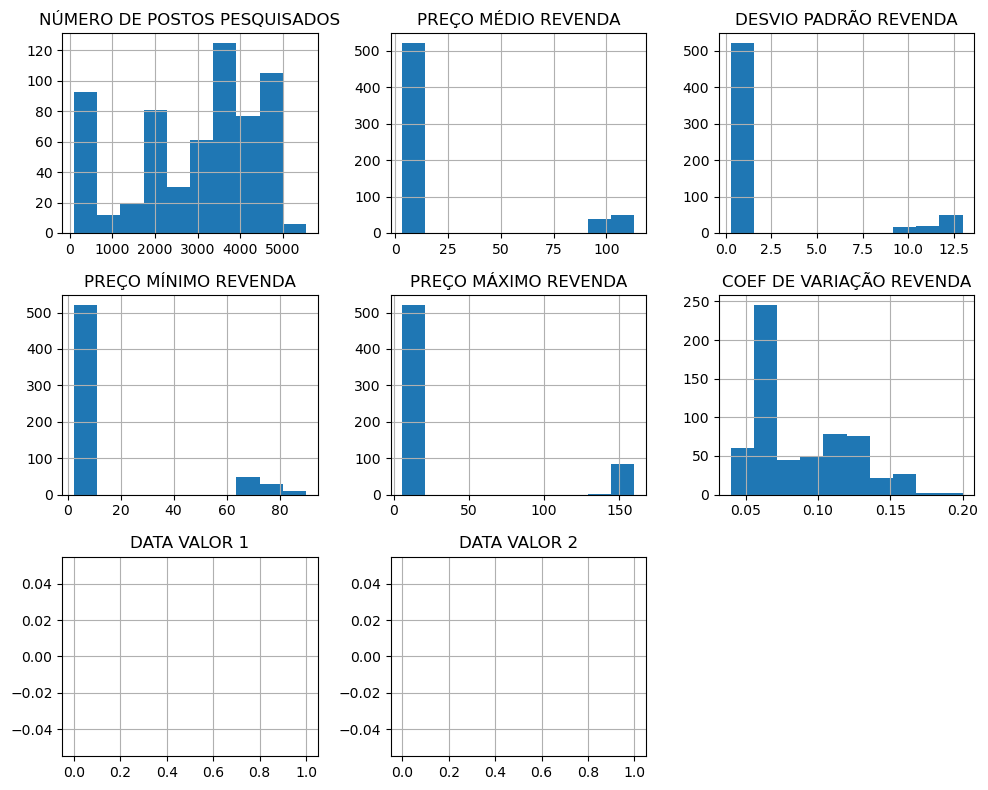


Análise de correlação:


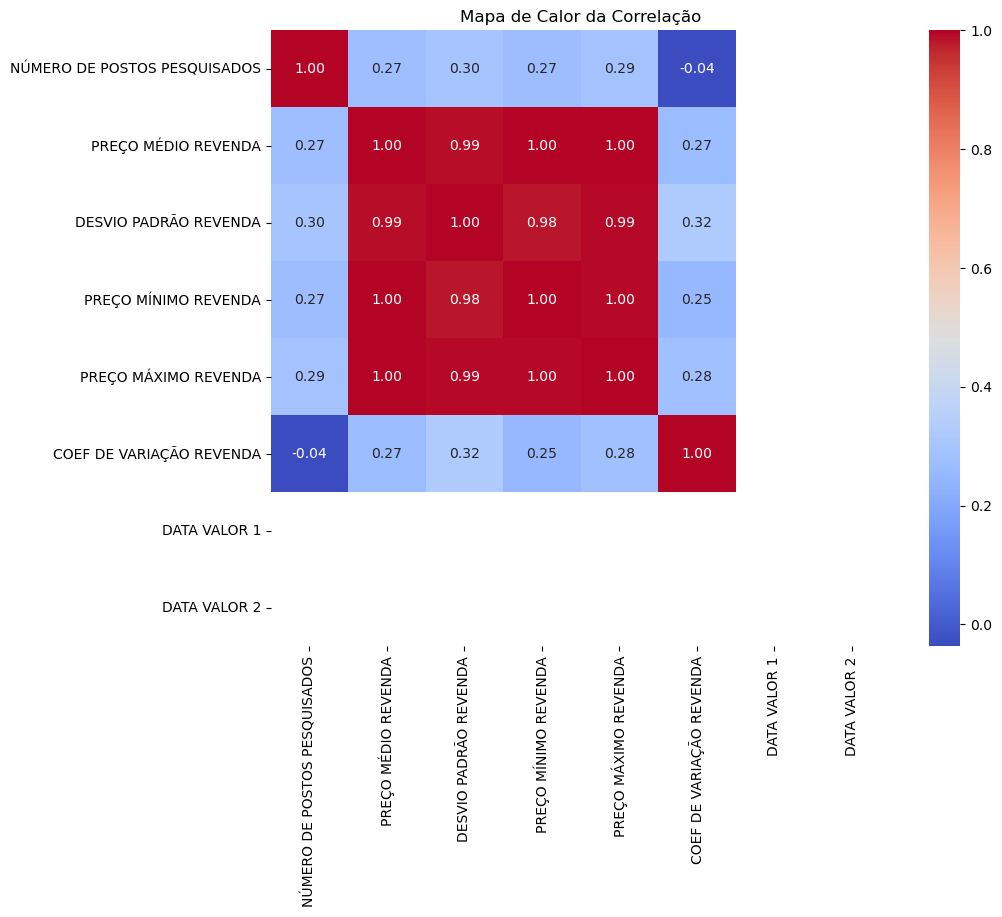


Análise de variáveis categóricas:

Contagem de valores únicos para BRASIL:
BRASIL    609
Name: BRASIL, dtype: int64

Gráfico de barras para BRASIL:


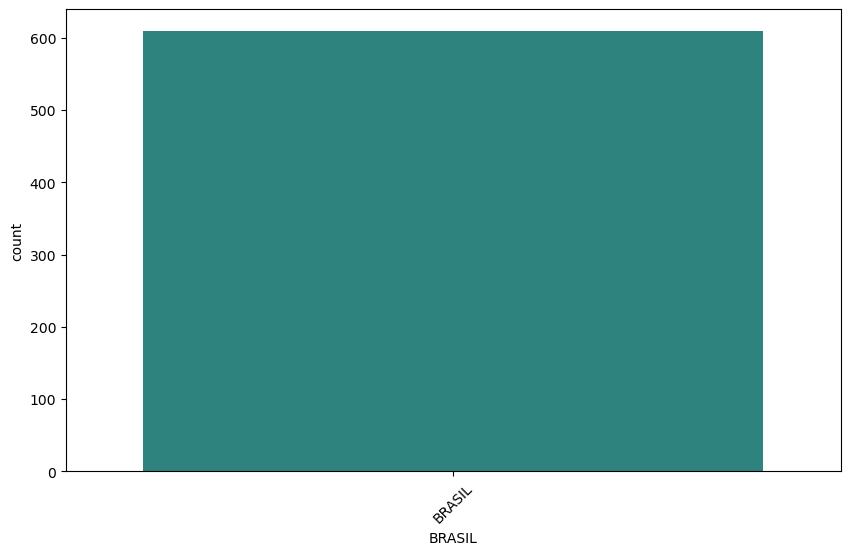


Contagem de valores únicos para PRODUTO:
ETANOL HIDRATADO      87
GASOLINA COMUM        87
GASOLINA ADITIVADA    87
OLEO DIESEL           87
OLEO DIESEL S10       87
GNV                   87
GLP                   87
Name: PRODUTO, dtype: int64

Gráfico de barras para PRODUTO:


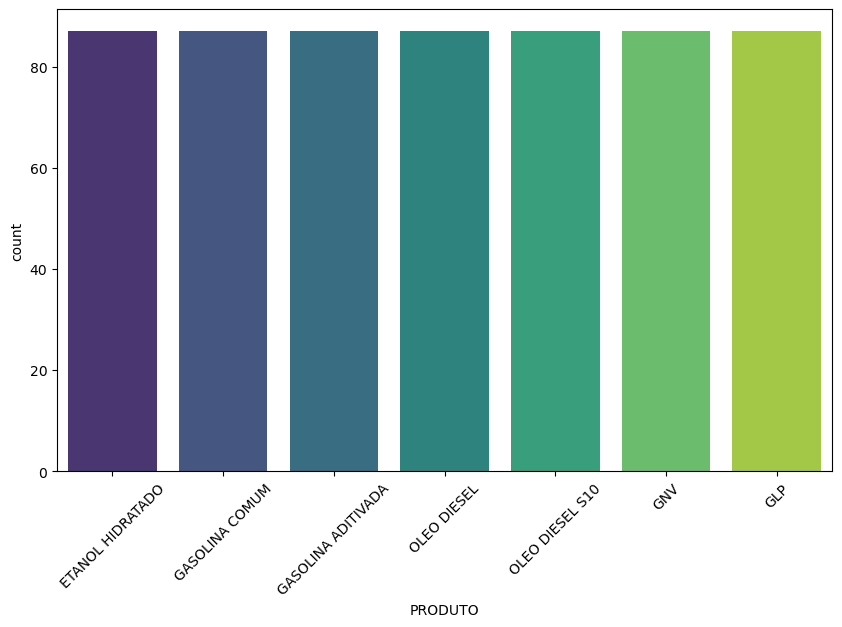


Contagem de valores únicos para UNIDADE DE MEDIDA:
R$/l       435
R$/m³       87
R$/13kg     87
Name: UNIDADE DE MEDIDA, dtype: int64

Gráfico de barras para UNIDADE DE MEDIDA:


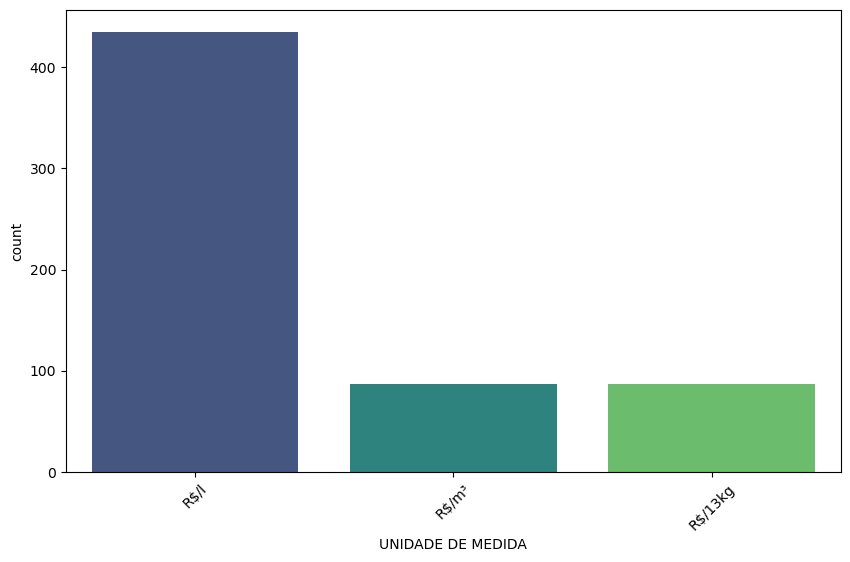


Contagem de valores únicos para TIPO PRODUTO:
GASOLINA            174
OLEO DIESEL         174
ETANOL HIDRATADO     87
GNV                  87
GLP                  87
Name: TIPO PRODUTO, dtype: int64

Gráfico de barras para TIPO PRODUTO:


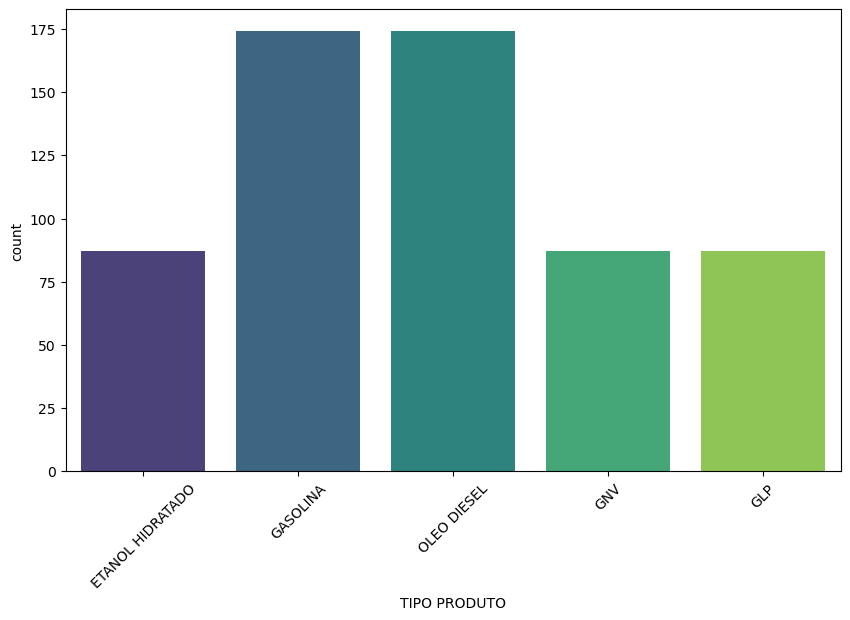


Tratamento de dados ausentes:
Número de valores ausentes por coluna:
DATA INICIAL                      0
DATA FINAL                        0
BRASIL                            0
PRODUTO                           0
NÚMERO DE POSTOS PESQUISADOS      0
UNIDADE DE MEDIDA                 0
PREÇO MÉDIO REVENDA               0
DESVIO PADRÃO REVENDA             0
PREÇO MÍNIMO REVENDA              0
PREÇO MÁXIMO REVENDA              0
COEF DE VARIAÇÃO REVENDA          0
TIPO PRODUTO                      0
DATA VALOR 1                    609
DATA VALOR 2                    609
dtype: int64


In [54]:
# Visão geral dos dados
print("Visão geral dos dados:")
print(dados_combustiveis.head())
print("\nInformações sobre os dados:")
print(dados_combustiveis.info())

# Resumo estatístico das variáveis numéricas
print("\nResumo estatístico das variáveis numéricas:")
print(dados_combustiveis.describe())

# Análise das distribuições
print("\nAnálise das distribuições:")
dados_numericos = dados_combustiveis.select_dtypes(include=['float64', 'int64'])
dados_numericos.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

# Análise de correlação
print("\nAnálise de correlação:")
correlacao = dados_numericos.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor da Correlação')
plt.show()

# Análise de variáveis categóricas
print("\nAnálise de variáveis categóricas:")
dados_categoricos = dados_combustiveis.select_dtypes(include=['object'])
for coluna in dados_categoricos.columns:
    print(f"\nContagem de valores únicos para {coluna}:")
    print(dados_categoricos[coluna].value_counts())

    print(f"\nGráfico de barras para {coluna}:")
    plt.figure(figsize=(10, 6))
    sns.countplot(data=dados_categoricos, x=coluna, palette='viridis')
    plt.xticks(rotation=45)
    plt.show()

# Tratamento de dados ausentes
print("\nTratamento de dados ausentes:")
print("Número de valores ausentes por coluna:")
print(dados_combustiveis.isnull().sum())

# Outras análises específicas
# Se necessário, adicione aqui outras análises específicas de acordo com os objetivos e contexto dos dados.


# Análises Brasil

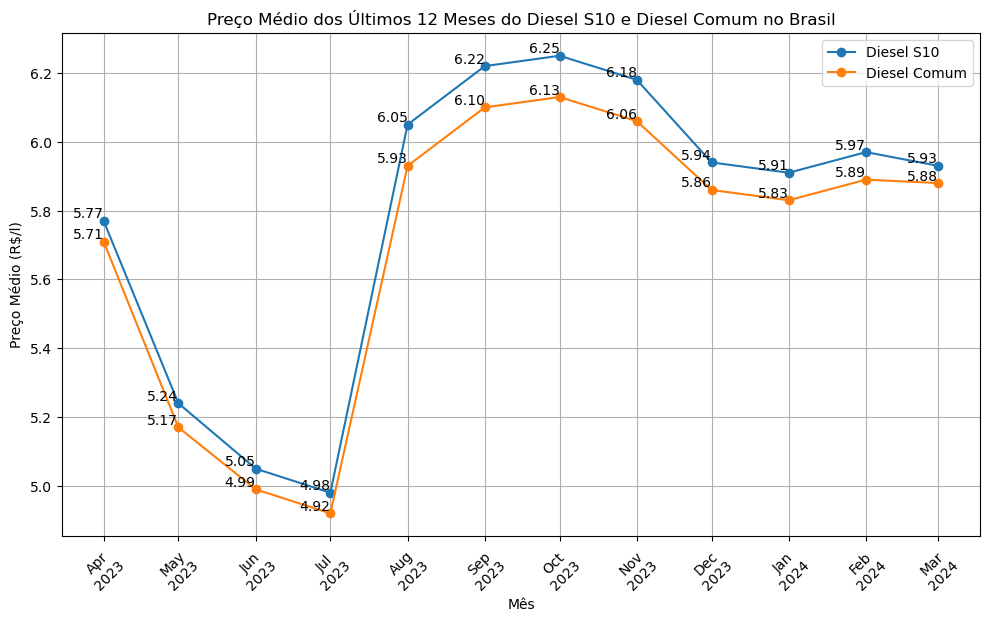

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

# Filtrar os dados para os últimos 12 meses do diesel S10 e diesel comum no Brasil
data_atual = pd.to_datetime('today')
data_inicio = data_atual - pd.DateOffset(months=12)
dados_ultimos_12_meses = dados_combustiveis[(dados_combustiveis['DATA FINAL'] >= data_inicio) & (dados_combustiveis['DATA FINAL'] <= data_atual)]
dados_ultimos_12_meses_br = dados_ultimos_12_meses[dados_ultimos_12_meses['BRASIL'] == 'BRASIL']

# Agrupar os dados por mês e selecionar o preço na última data de cada mês para cada tipo de diesel
preco_medio_diesel_s10 = dados_ultimos_12_meses_br[dados_ultimos_12_meses_br['PRODUTO'] == 'OLEO DIESEL S10'].groupby(dados_ultimos_12_meses_br['DATA FINAL'].dt.to_period('M'))['PREÇO MÉDIO REVENDA'].last()
preco_medio_diesel_comum = dados_ultimos_12_meses_br[dados_ultimos_12_meses_br['PRODUTO'] == 'OLEO DIESEL'].groupby(dados_ultimos_12_meses_br['DATA FINAL'].dt.to_period('M'))['PREÇO MÉDIO REVENDA'].last()

# Plotar o gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(preco_medio_diesel_s10.index.to_timestamp(), preco_medio_diesel_s10, label='Diesel S10', marker='o')
plt.plot(preco_medio_diesel_comum.index.to_timestamp(), preco_medio_diesel_comum, label='Diesel Comum', marker='o')
plt.title('Preço Médio dos Últimos 12 Meses do Diesel S10 e Diesel Comum no Brasil')
plt.xlabel('Mês')
plt.ylabel('Preço Médio (R$/l)')
plt.legend()
plt.grid(True)

# Adicionar rótulos de dados aos pontos
for x, y in zip(preco_medio_diesel_s10.index.to_timestamp(), preco_medio_diesel_s10):
    plt.text(x, y, f'{y:.2f}', ha='right', va='bottom')

for x, y in zip(preco_medio_diesel_comum.index.to_timestamp(), preco_medio_diesel_comum):
    plt.text(x, y, f'{y:.2f}', ha='right', va='bottom')

plt.tight_layout()

# Definir intervalo entre os ticks do eixo x para cada mês
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))  # Formato: abreviação do mês e ano
plt.xticks(rotation=45)

plt.show()


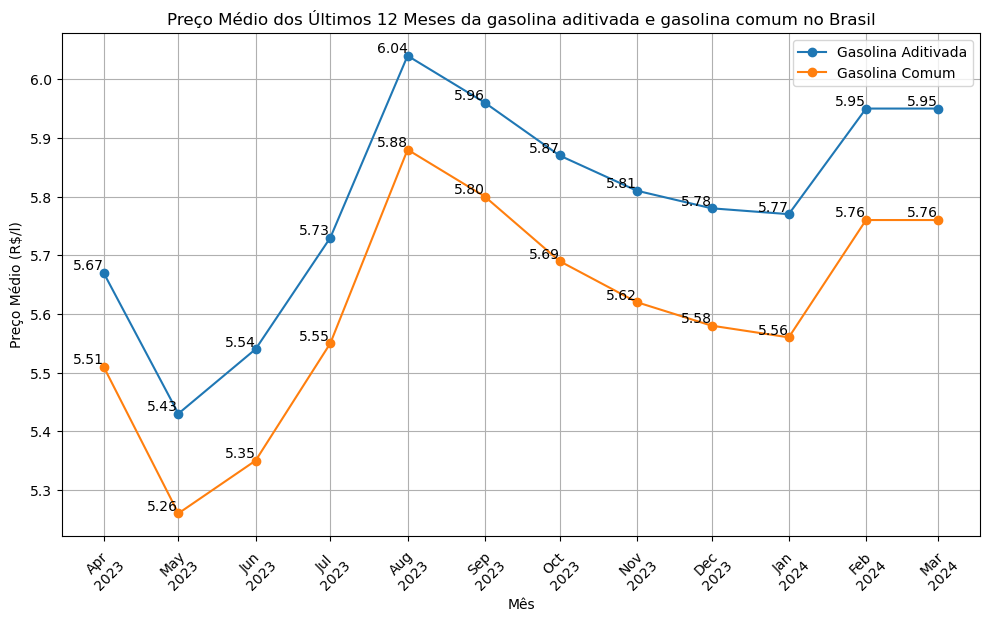

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

# Filtrar os dados para os últimos 12 meses da gasolina aditivada e gasolina comum no Brasil
data_atual = pd.to_datetime('today')
data_inicio = data_atual - pd.DateOffset(months=12)
dados_ultimos_12_meses = dados_combustiveis[(dados_combustiveis['DATA FINAL'] >= data_inicio) & (dados_combustiveis['DATA FINAL'] <= data_atual)]
dados_ultimos_12_meses_br = dados_ultimos_12_meses[dados_ultimos_12_meses['BRASIL'] == 'BRASIL']

# Agrupar os dados por mês e selecionar o preço na última data de cada mês para cada tipo de gasolina
preco_medio_gasolina_adt = dados_ultimos_12_meses_br[dados_ultimos_12_meses_br['PRODUTO'] == 'GASOLINA ADITIVADA'].groupby(dados_ultimos_12_meses_br['DATA FINAL'].dt.to_period('M'))['PREÇO MÉDIO REVENDA'].last()
preco_medio_gasolina_comum = dados_ultimos_12_meses_br[dados_ultimos_12_meses_br['PRODUTO'] == 'GASOLINA COMUM'].groupby(dados_ultimos_12_meses_br['DATA FINAL'].dt.to_period('M'))['PREÇO MÉDIO REVENDA'].last()

# Plotar o gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(preco_medio_gasolina_adt.index.to_timestamp(), preco_medio_gasolina_adt, label='Gasolina Aditivada', marker='o')
plt.plot(preco_medio_gasolina_comum.index.to_timestamp(), preco_medio_gasolina_comum, label='Gasolina Comum', marker='o')
plt.title('Preço Médio dos Últimos 12 Meses da gasolina aditivada e gasolina comum no Brasil')
plt.xlabel('Mês')
plt.ylabel('Preço Médio (R$/l)')
plt.legend()
plt.grid(True)

# Adicionar rótulos de dados aos pontos
for x, y in zip(preco_medio_diesel_s10.index.to_timestamp(), preco_medio_gasolina_adt):
    plt.text(x, y, f'{y:.2f}', ha='right', va='bottom')

for x, y in zip(preco_medio_diesel_comum.index.to_timestamp(), preco_medio_gasolina_comum):
    plt.text(x, y, f'{y:.2f}', ha='right', va='bottom')

plt.tight_layout()

# Definir intervalo entre os ticks do eixo x para cada mês
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))  # Formato: abreviação do mês e ano
plt.xticks(rotation=45)

plt.show()


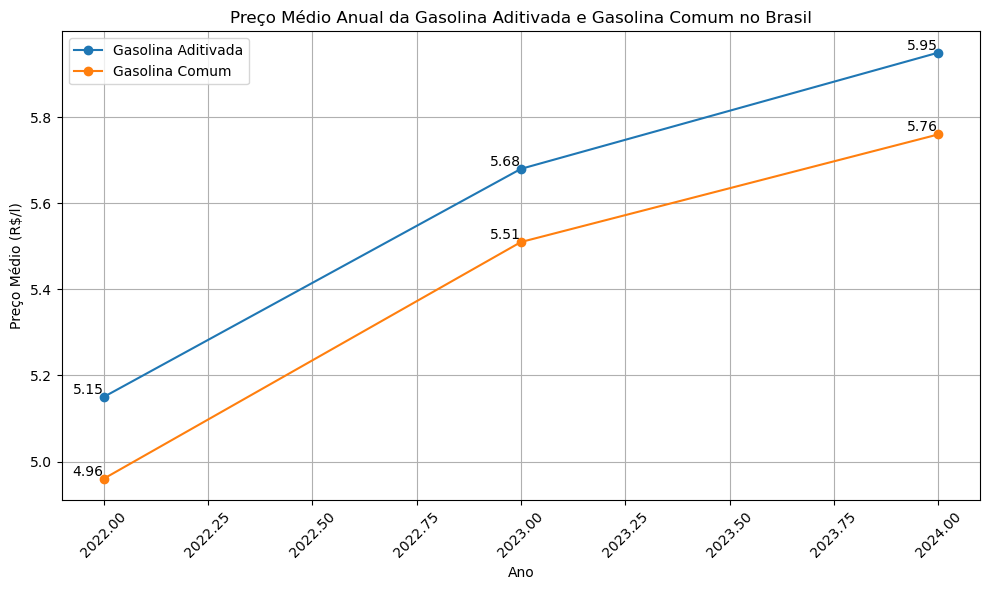

In [61]:
# Agrupar os dados por ano e selecionar o preço na última data de cada ano para cada tipo de gasolina
preco_medio_gasolina_adt = dados_combustiveis[dados_combustiveis['PRODUTO'] == 'GASOLINA ADITIVADA'].groupby(dados_combustiveis['DATA FINAL'].dt.year)['PREÇO MÉDIO REVENDA'].last()
preco_medio_gasolina_comum = dados_combustiveis[dados_combustiveis['PRODUTO'] == 'GASOLINA COMUM'].groupby(dados_combustiveis['DATA FINAL'].dt.year)['PREÇO MÉDIO REVENDA'].last()

# Plotar o gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(preco_medio_gasolina_adt.index, preco_medio_gasolina_adt, label='Gasolina Aditivada', marker='o')
plt.plot(preco_medio_gasolina_comum.index, preco_medio_gasolina_comum, label='Gasolina Comum', marker='o')
plt.title('Preço Médio Anual da Gasolina Aditivada e Gasolina Comum no Brasil')
plt.xlabel('Ano')
plt.ylabel('Preço Médio (R$/l)')
plt.legend()
plt.grid(True)

# Adicionar rótulos de dados aos pontos
for x, y in zip(preco_medio_gasolina_adt.index, preco_medio_gasolina_adt):
    plt.text(x, y, f'{y:.2f}', ha='right', va='bottom')

for x, y in zip(preco_medio_gasolina_comum.index, preco_medio_gasolina_comum):
    plt.text(x, y, f'{y:.2f}', ha='right', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


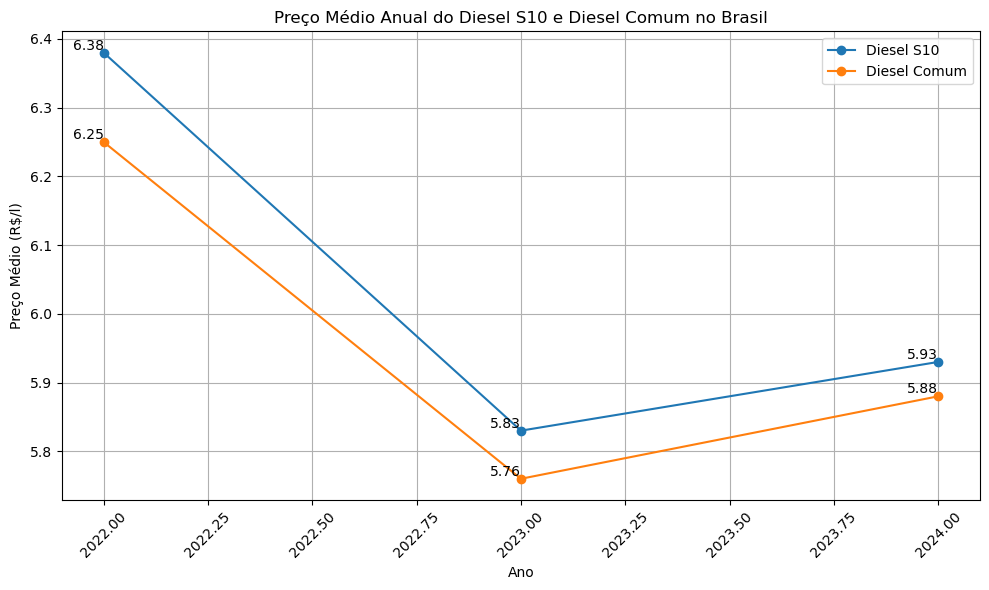

In [62]:
# Filtrar os dados para os últimos 5 anos do diesel S10 e diesel comum no Brasil
data_inicio = data_atual - pd.DateOffset(years=5)
dados_ultimos_anos = dados_combustiveis[(dados_combustiveis['DATA FINAL'] >= data_inicio) & (dados_combustiveis['DATA FINAL'] <= data_atual)]
dados_ultimos_anos_br = dados_ultimos_anos[dados_ultimos_anos['BRASIL'] == 'BRASIL']

# Agrupar os dados por ano e selecionar o preço na última data de cada ano para cada tipo de diesel
preco_medio_diesel_s10 = dados_ultimos_anos_br[dados_ultimos_anos_br['PRODUTO'] == 'OLEO DIESEL S10'].groupby(dados_ultimos_anos_br['DATA FINAL'].dt.year)['PREÇO MÉDIO REVENDA'].last()
preco_medio_diesel_comum = dados_ultimos_anos_br[dados_ultimos_anos_br['PRODUTO'] == 'OLEO DIESEL'].groupby(dados_ultimos_anos_br['DATA FINAL'].dt.year)['PREÇO MÉDIO REVENDA'].last()

# Plotar o gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(preco_medio_diesel_s10.index, preco_medio_diesel_s10, label='Diesel S10', marker='o')
plt.plot(preco_medio_diesel_comum.index, preco_medio_diesel_comum, label='Diesel Comum', marker='o')
plt.title('Preço Médio Anual do Diesel S10 e Diesel Comum no Brasil')
plt.xlabel('Ano')
plt.ylabel('Preço Médio (R$/l)')
plt.legend()
plt.grid(True)

# Adicionar rótulos de dados aos pontos
for x, y in zip(preco_medio_diesel_s10.index, preco_medio_diesel_s10):
    plt.text(x, y, f'{y:.2f}', ha='right', va='bottom')

for x, y in zip(preco_medio_diesel_comum.index, preco_medio_diesel_comum):
    plt.text(x, y, f'{y:.2f}', ha='right', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Análise Exploratória Estados

In [64]:
# Carregar os dados apenas da aba 'ESTADOS'
dados_combustiveis_estados = pd.read_excel(r'C:\Users\ricardo\Desktop\analises\01 - Painel do Diesel - Bases\base_diesel_desde__31_07_2022.xlsx', sheet_name='ESTADOS')


Visão geral dos dados:
  DATA INICIAL DATA FINAL    REGIAO   ESTADOS           PRODUTO  \
0   2022-08-07 2022-08-13     NORTE      ACRE  ETANOL HIDRATADO   
1   2022-08-07 2022-08-13  NORDESTE   ALAGOAS  ETANOL HIDRATADO   
2   2022-08-07 2022-08-13     NORTE  AMAZONAS  ETANOL HIDRATADO   
3   2022-08-07 2022-08-13  NORDESTE     BAHIA  ETANOL HIDRATADO   
4   2022-08-07 2022-08-13  NORDESTE     CEARA  ETANOL HIDRATADO   

   NÚMERO DE POSTOS PESQUISADOS UNIDADE DE MEDIDA  PREÇO MÉDIO REVENDA  \
0                            20              R$/l                 5.04   
1                            58              R$/l                 4.89   
2                            45              R$/l                 4.77   
3                           320              R$/l                 4.88   
4                           195              R$/l                 5.15   

  DESVIO PADRÃO REVENDA  PREÇO MÍNIMO REVENDA  PREÇO MÁXIMO REVENDA  \
0              0.373214                  4.94             

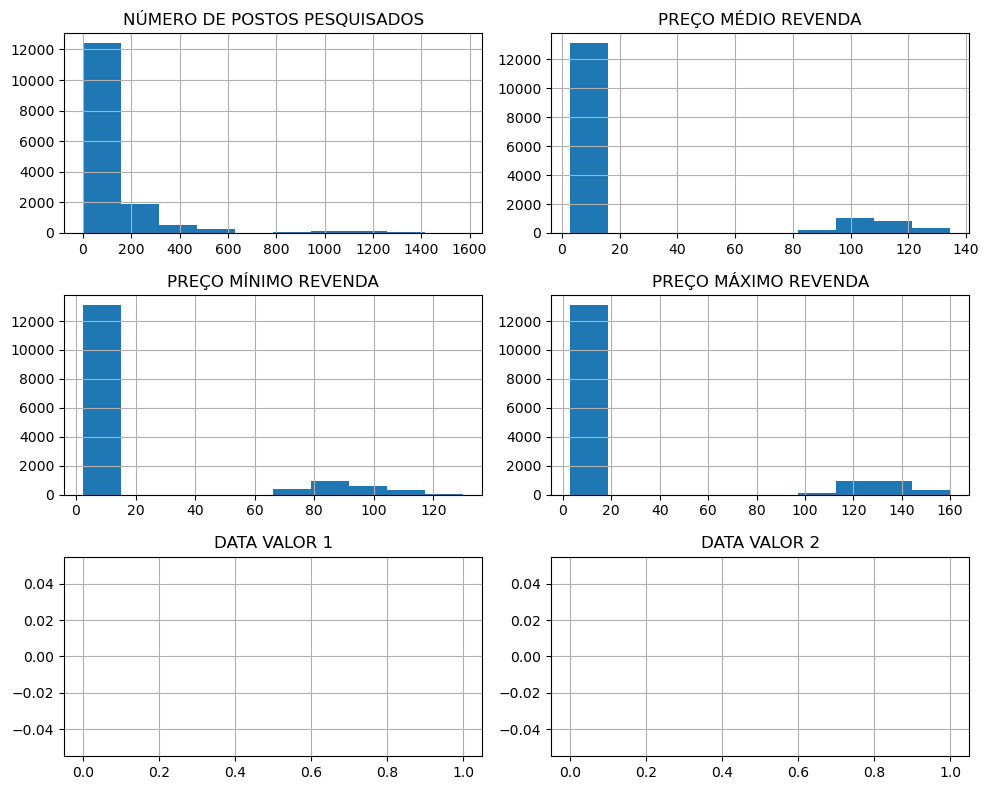


Análise de correlação:


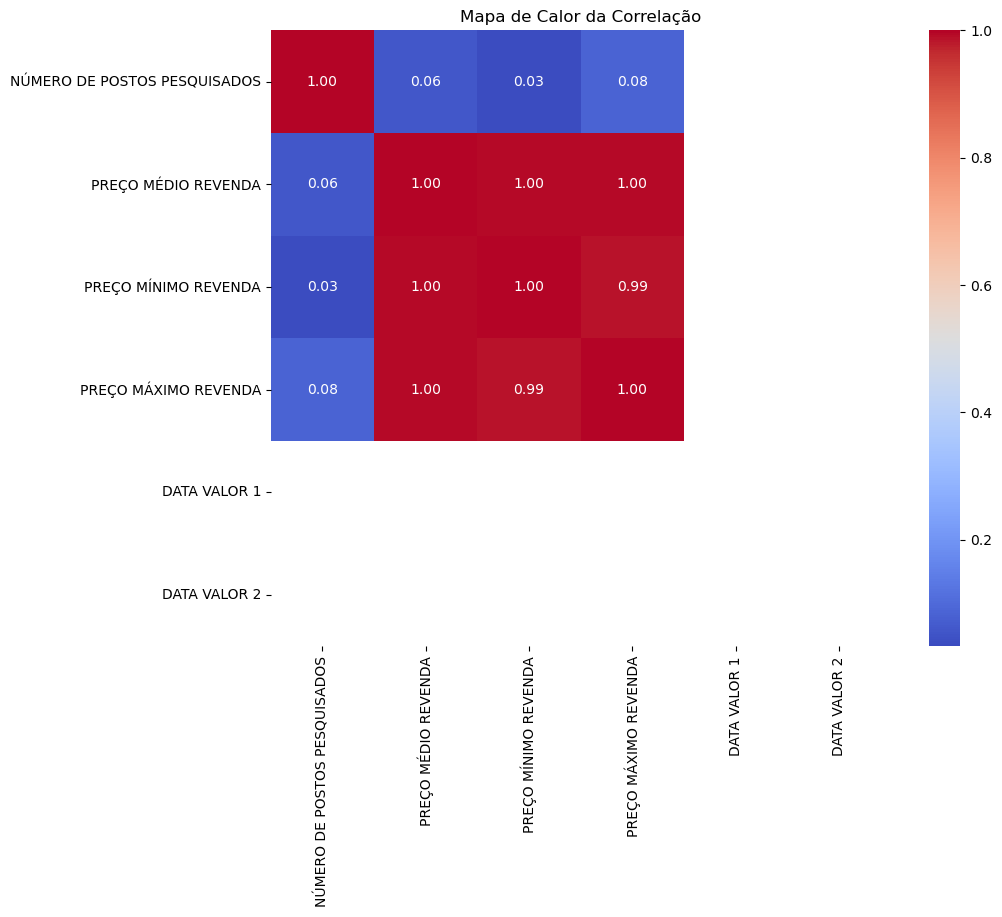


Análise de variáveis categóricas:

Contagem de valores únicos para REGIAO:
NORDESTE        5300
NORTE           3675
SUDESTE         2436
CENTRO OESTE    2248
SUL             1825
Name: REGIAO, dtype: int64

Gráfico de barras para REGIAO:


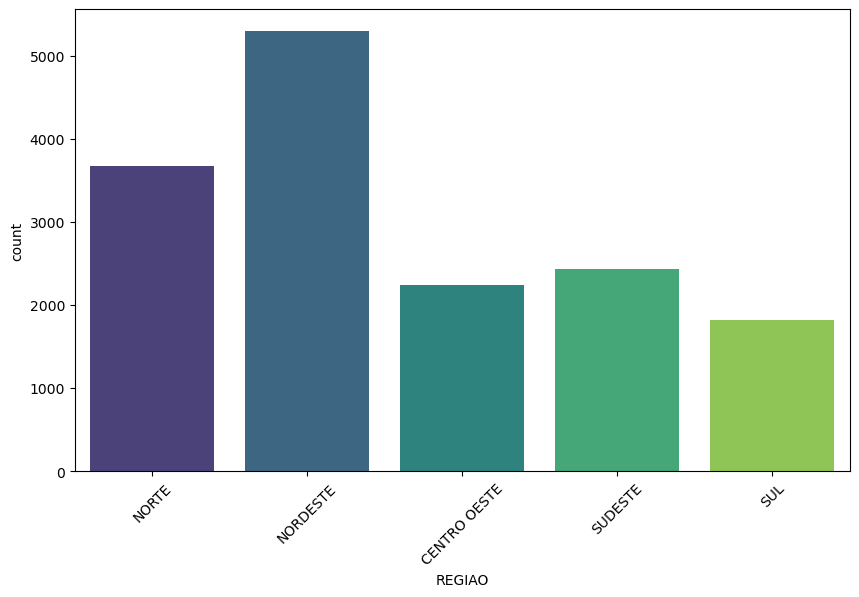


Contagem de valores únicos para ESTADOS:
PARAIBA                609
ESPIRITO SANTO         609
RIO GRANDE DO SUL      609
RIO GRANDE DO NORTE    609
RIO DE JANEIRO         609
MINAS GERAIS           609
SAO PAULO              609
PARANA                 608
ALAGOAS                608
SANTA CATARINA         608
CEARA                  608
BAHIA                  608
PERNAMBUCO             607
SERGIPE                605
MATO GROSSO            603
AMAZONAS               600
MATO GROSSO DO SUL     576
DISTRITO FEDERAL       547
MARANHAO               524
GOIAS                  522
PARA                   522
TOCANTINS              522
PIAUI                  522
RONDONIA               521
RORAIMA                517
ACRE                   509
AMAPA                  484
Name: ESTADOS, dtype: int64

Gráfico de barras para ESTADOS:


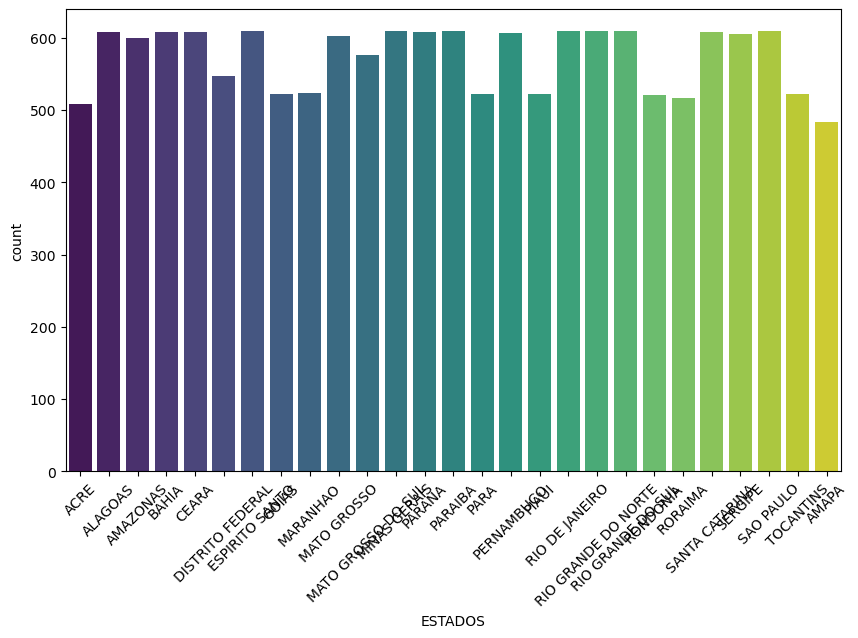


Contagem de valores únicos para PRODUTO:
GASOLINA COMUM        2344
GASOLINA ADITIVADA    2343
OLEO DIESEL S10       2343
GLP                   2340
OLEO DIESEL           2334
ETANOL HIDRATADO      2319
GNV                   1461
Name: PRODUTO, dtype: int64

Gráfico de barras para PRODUTO:


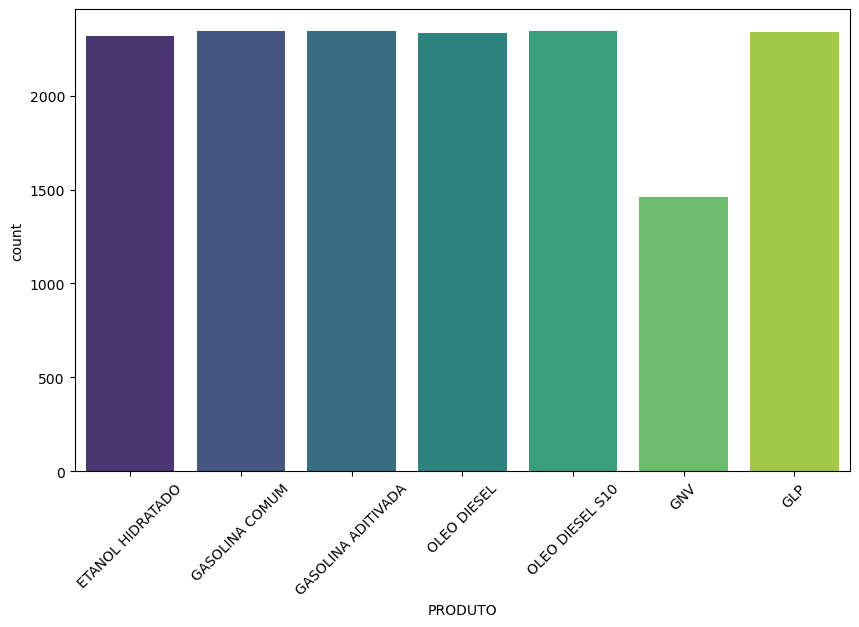


Contagem de valores únicos para UNIDADE DE MEDIDA:
R$/l       11683
R$/13kg     2340
R$/m³       1461
Name: UNIDADE DE MEDIDA, dtype: int64

Gráfico de barras para UNIDADE DE MEDIDA:


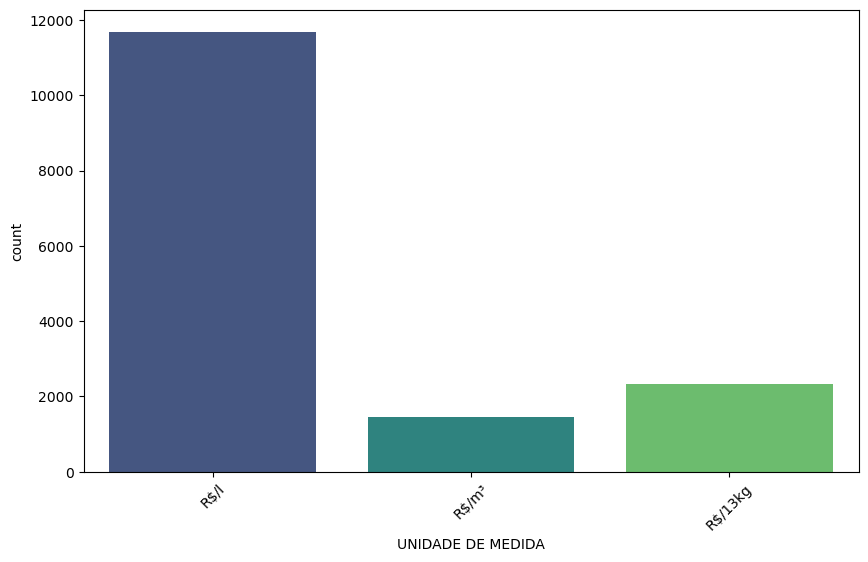


Contagem de valores únicos para DESVIO PADRÃO REVENDA:
0.000    409
0.250     64
0.256     57
0.276     56
0.268     56
        ... 
8.598      1
6.772      1
8.597      1
8.873      1
3.915      1
Name: DESVIO PADRÃO REVENDA, Length: 3480, dtype: int64

Gráfico de barras para DESVIO PADRÃO REVENDA:


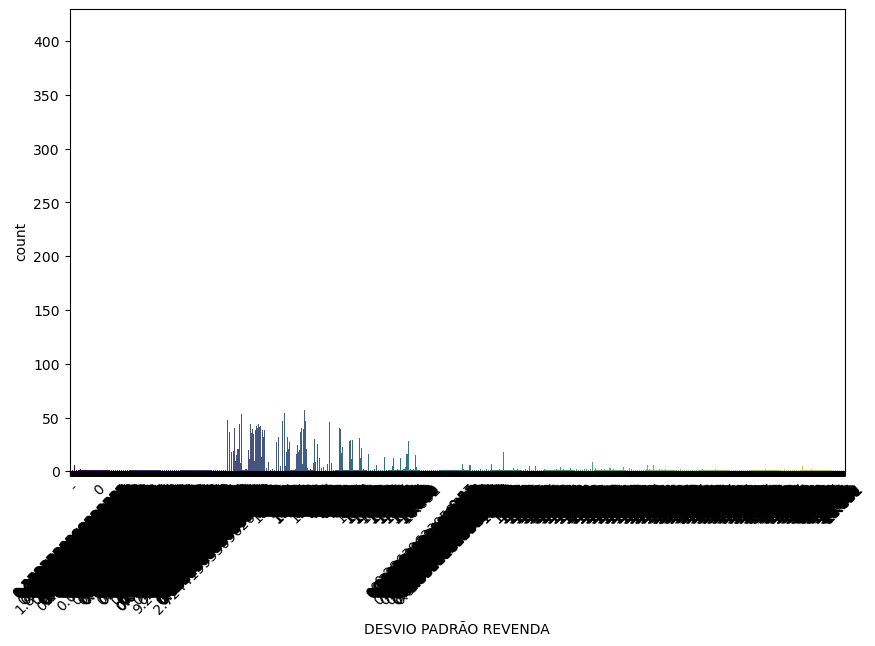


Contagem de valores únicos para COEF DE VARIAÇÃO REVENDA:
0.040000    900
0.050000    755
0.030000    617
0.060000    490
0.000000    483
           ... 
0.061773      1
0.079718      1
0.061830      1
0.069280      1
0.143000      1
Name: COEF DE VARIAÇÃO REVENDA, Length: 1060, dtype: int64

Gráfico de barras para COEF DE VARIAÇÃO REVENDA:


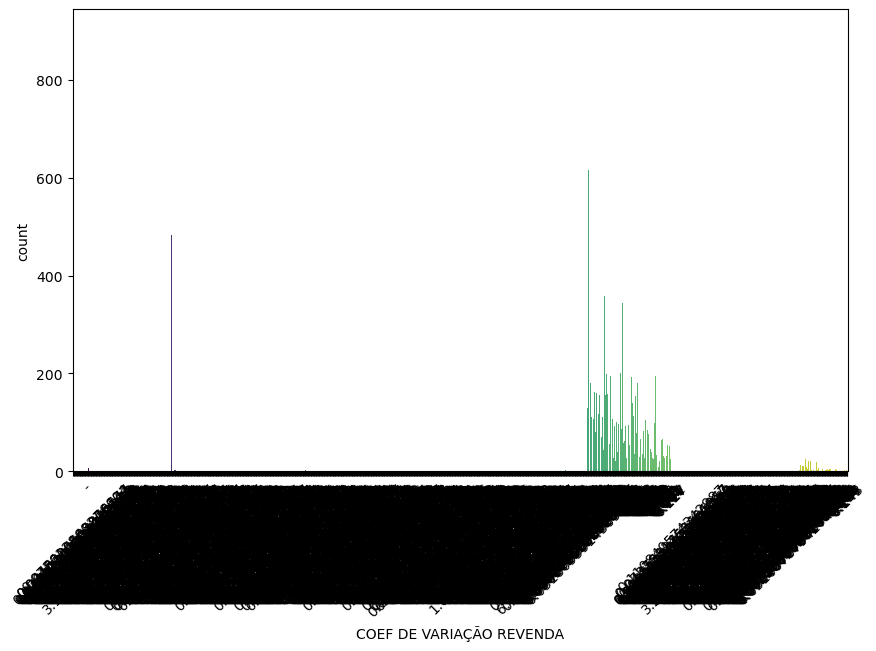


Contagem de valores únicos para TIPO PRODUTO:
GASOLINA            4687
OLEO DIESEL         4677
GLP                 2340
ETANOL HIDRATADO    2319
GNV                 1461
Name: TIPO PRODUTO, dtype: int64

Gráfico de barras para TIPO PRODUTO:


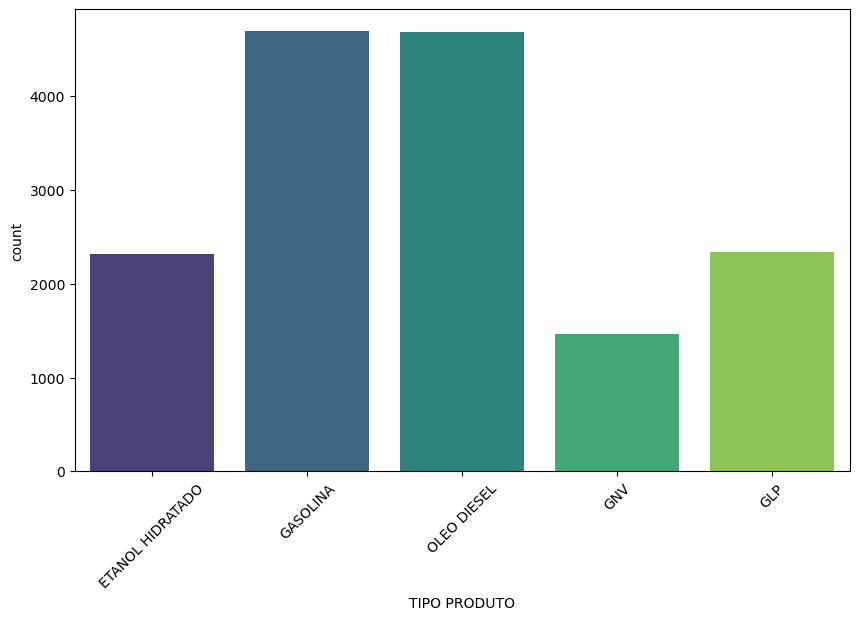


Tratamento de dados ausentes:
Número de valores ausentes por coluna:
DATA INICIAL                        0
DATA FINAL                          0
REGIAO                              0
ESTADOS                             0
PRODUTO                             0
NÚMERO DE POSTOS PESQUISADOS        0
UNIDADE DE MEDIDA                   0
PREÇO MÉDIO REVENDA                 0
DESVIO PADRÃO REVENDA               0
PREÇO MÍNIMO REVENDA                0
PREÇO MÁXIMO REVENDA                0
COEF DE VARIAÇÃO REVENDA            0
TIPO PRODUTO                        0
DATA VALOR 1                    15484
DATA VALOR 2                    15484
dtype: int64


In [65]:
# Visão geral dos dados
print("Visão geral dos dados:")
print(dados_combustiveis_estados.head())
print("\nInformações sobre os dados:")
print(dados_combustiveis_estados.info())

# Resumo estatístico das variáveis numéricas
print("\nResumo estatístico das variáveis numéricas:")
print(dados_combustiveis_estados.describe())

# Análise das distribuições
print("\nAnálise das distribuições:")
dados_numericos = dados_combustiveis_estados.select_dtypes(include=['float64', 'int64'])
dados_numericos.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

# Análise de correlação
print("\nAnálise de correlação:")
correlacao = dados_numericos.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor da Correlação')
plt.show()

# Análise de variáveis categóricas
print("\nAnálise de variáveis categóricas:")
dados_categoricos = dados_combustiveis_estados.select_dtypes(include=['object'])
for coluna in dados_categoricos.columns:
    print(f"\nContagem de valores únicos para {coluna}:")
    print(dados_categoricos[coluna].value_counts())

    print(f"\nGráfico de barras para {coluna}:")
    plt.figure(figsize=(10, 6))
    sns.countplot(data=dados_categoricos, x=coluna, palette='viridis')
    plt.xticks(rotation=45)
    plt.show()

# Tratamento de dados ausentes
print("\nTratamento de dados ausentes:")
print("Número de valores ausentes por coluna:")
print(dados_combustiveis_estados.isnull().sum())

# Análises Estados

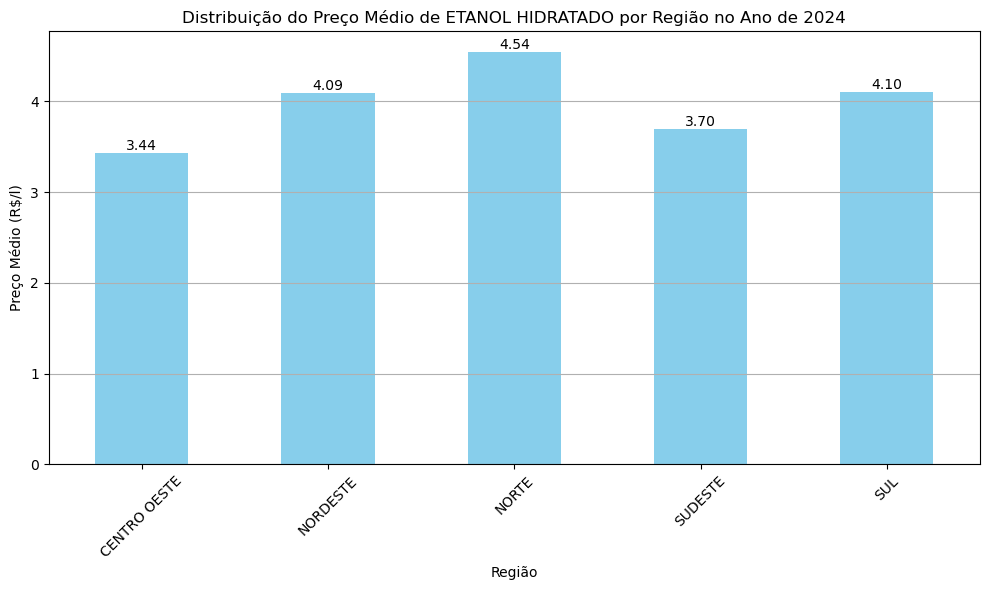

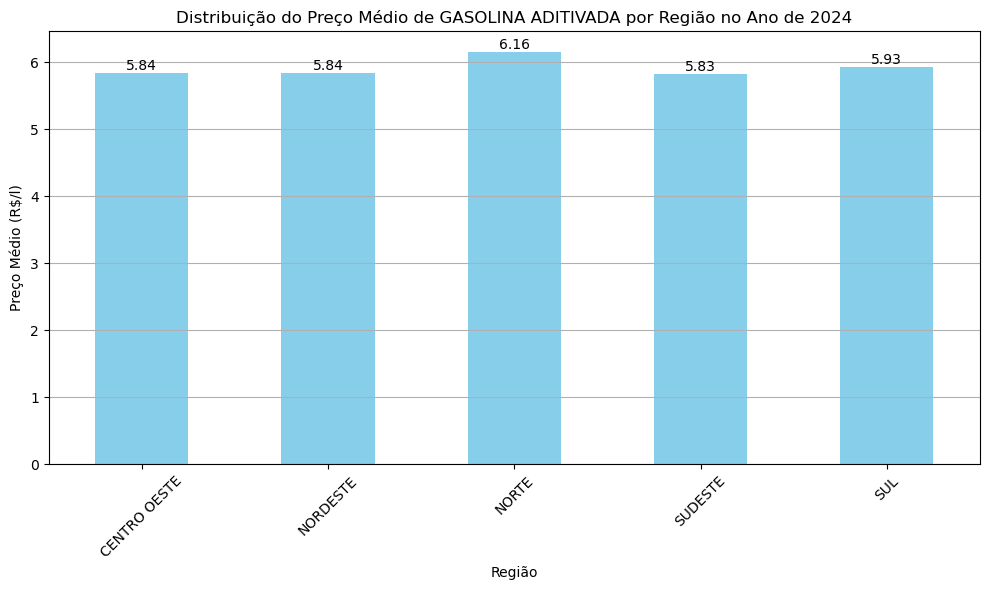

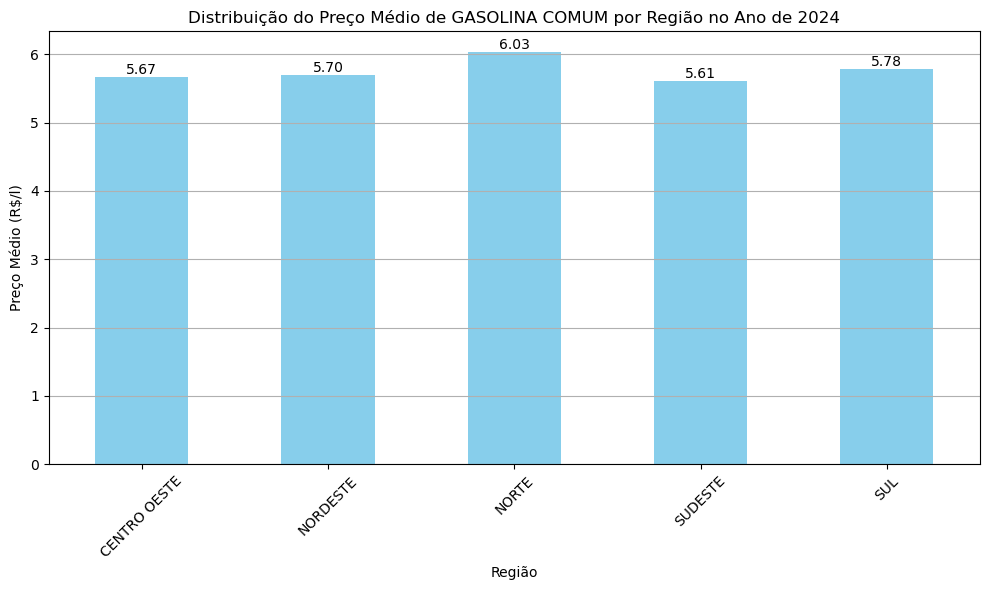

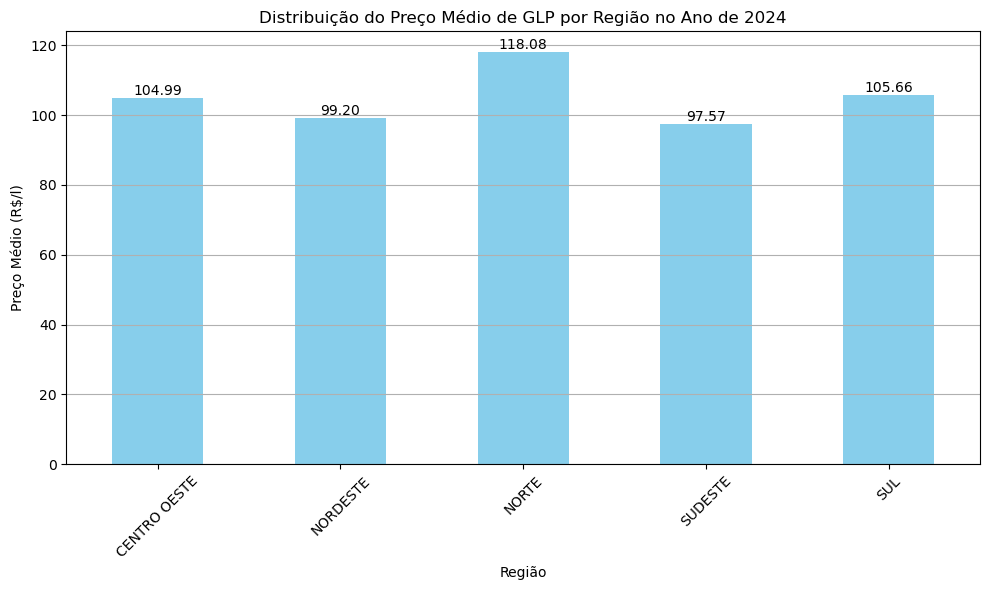

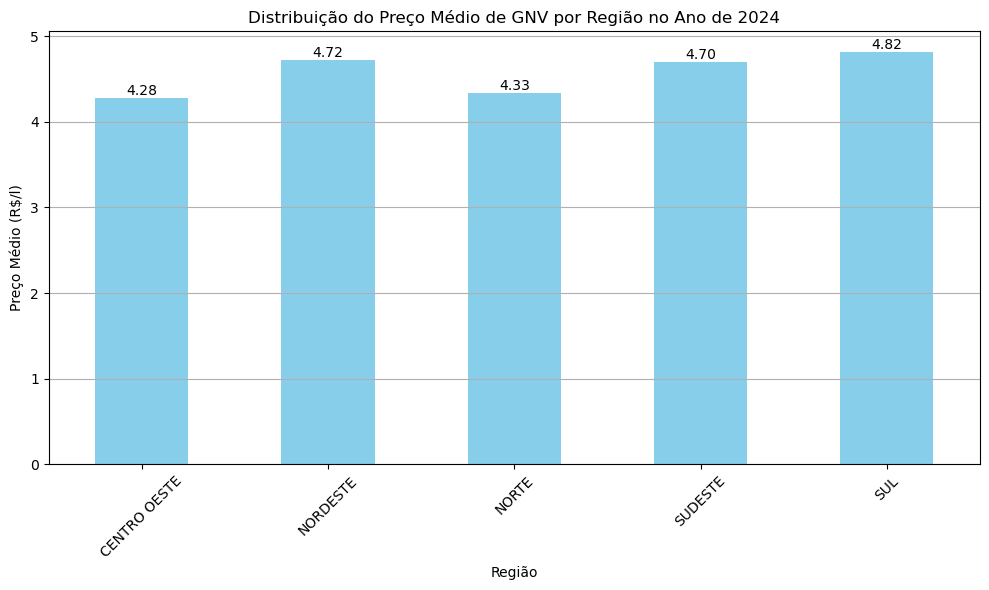

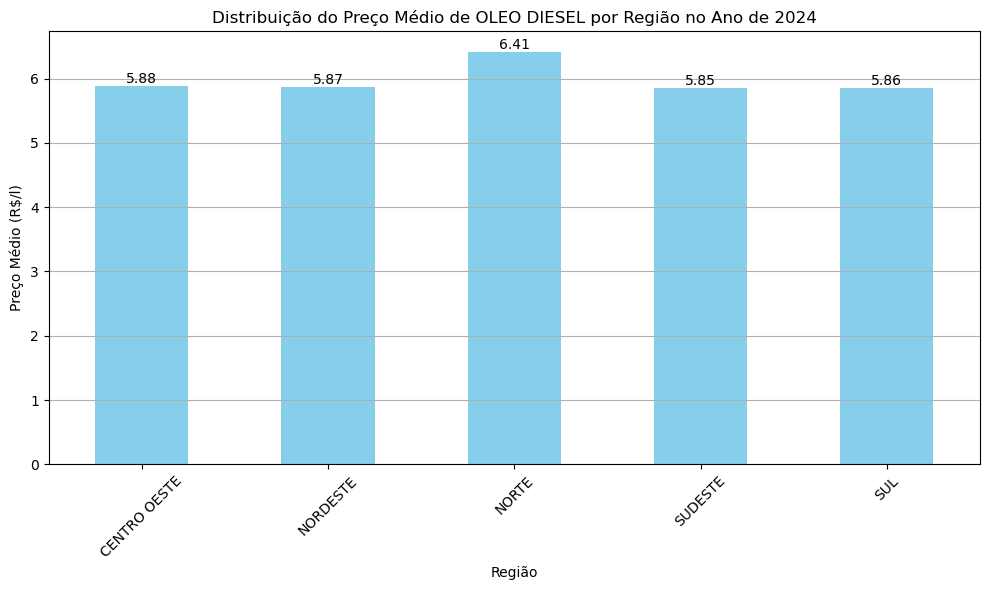

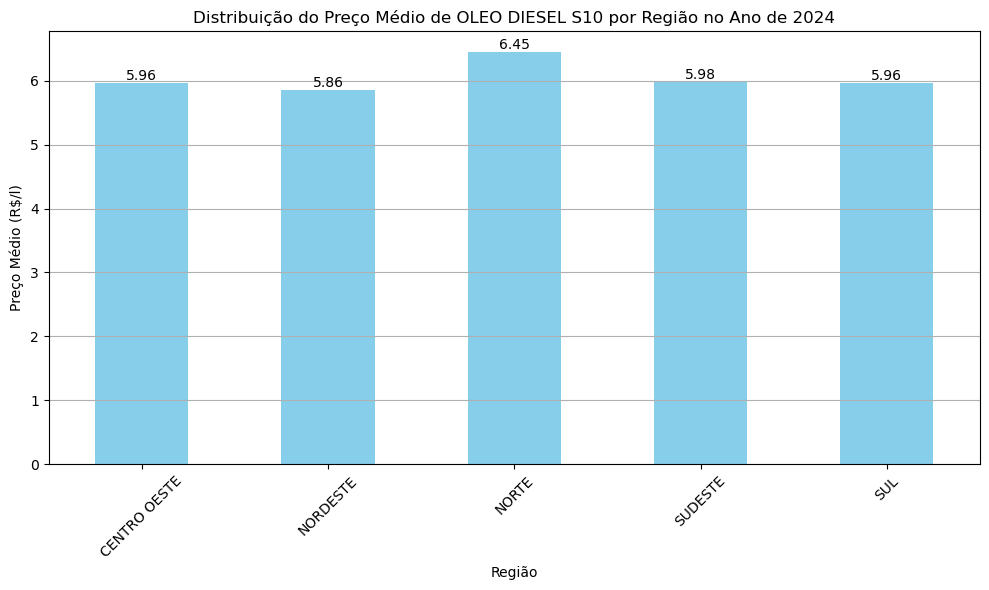

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# Extrair o ano da coluna 'DATA FINAL'
dados_combustiveis_estados['ANO'] = pd.to_datetime(dados_combustiveis_estados['DATA FINAL']).dt.year

# Encontrar o último ano disponível
ultimo_ano = dados_combustiveis_estados['ANO'].max()

# Filtrar os dados para o último ano
dados_ultimo_ano = dados_combustiveis_estados[dados_combustiveis_estados['ANO'] == ultimo_ano]

# Lista dos tipos de produto
tipos_produto = dados_ultimo_ano['PRODUTO'].unique()

# Plotar um gráfico de barras para cada tipo de produto
for produto in tipos_produto:
    # Filtrar os dados para o produto atual
    dados_produto = dados_ultimo_ano[dados_ultimo_ano['PRODUTO'] == produto]
    
    # Agrupar os dados por região e calcular o preço médio
    preco_medio_por_regiao = dados_produto.groupby('REGIAO')['PREÇO MÉDIO REVENDA'].mean()
    
    # Plotar o gráfico de barras
    plt.figure(figsize=(10, 6))
    preco_medio_por_regiao.plot(kind='bar', color='skyblue')
    plt.title(f'Distribuição do Preço Médio de {produto} por Região no Ano de {ultimo_ano}')
    plt.xlabel('Região')
    plt.ylabel('Preço Médio (R$/l)')
    
    # Adicionar rótulos de dados aos pontos
    for x, y in enumerate(preco_medio_por_regiao):
        plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')
    
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()


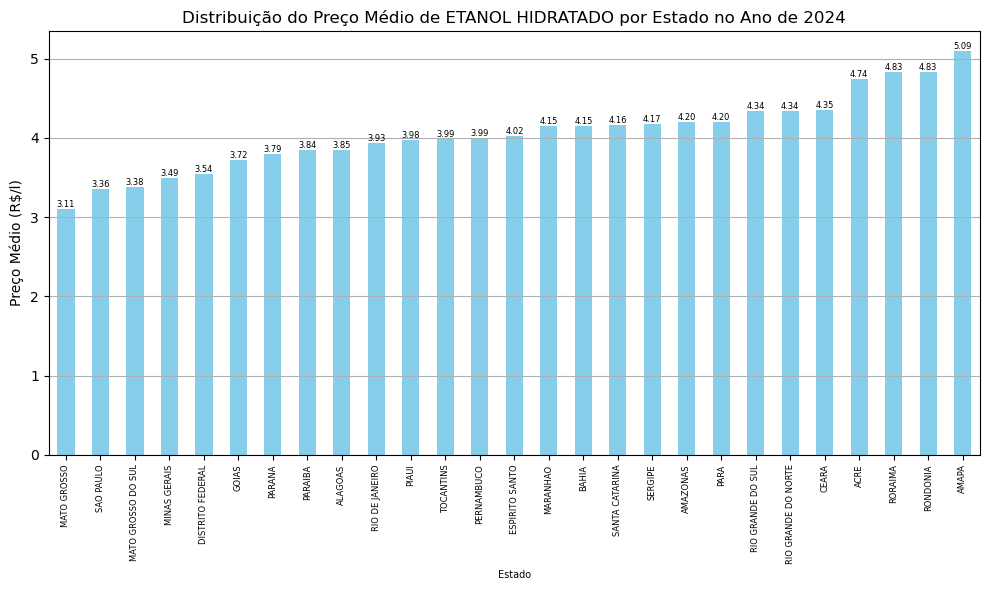

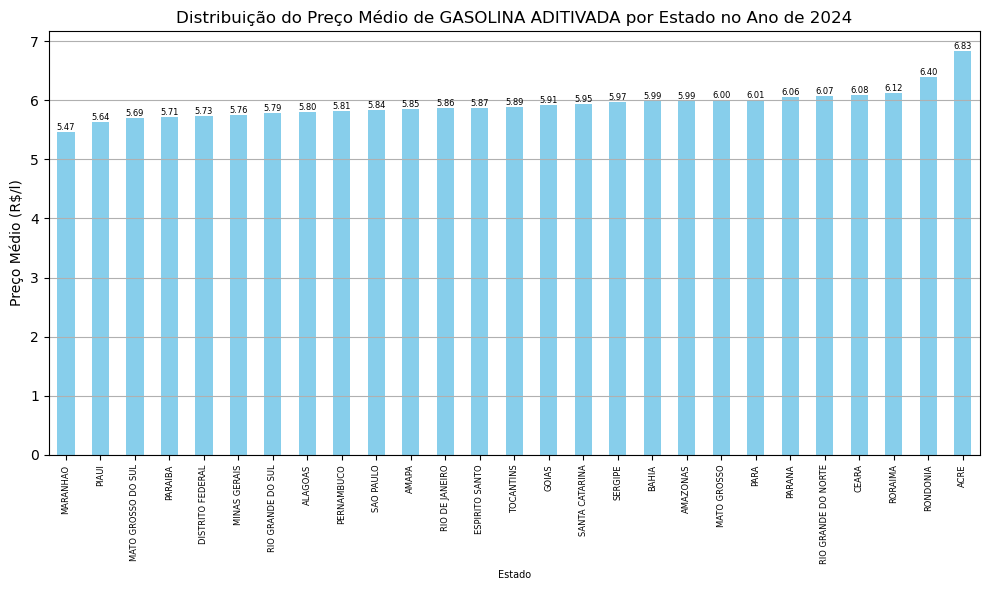

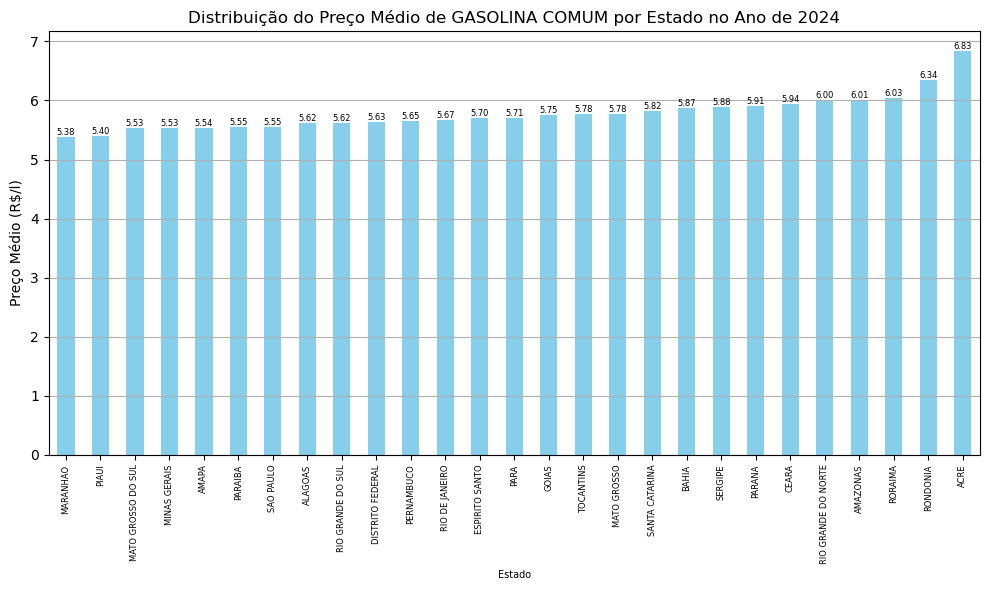

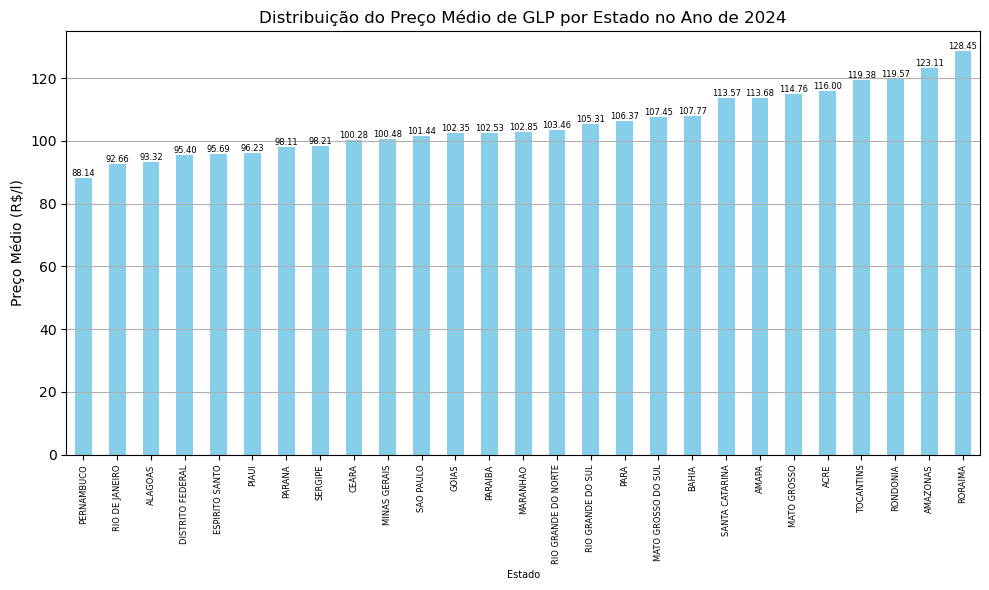

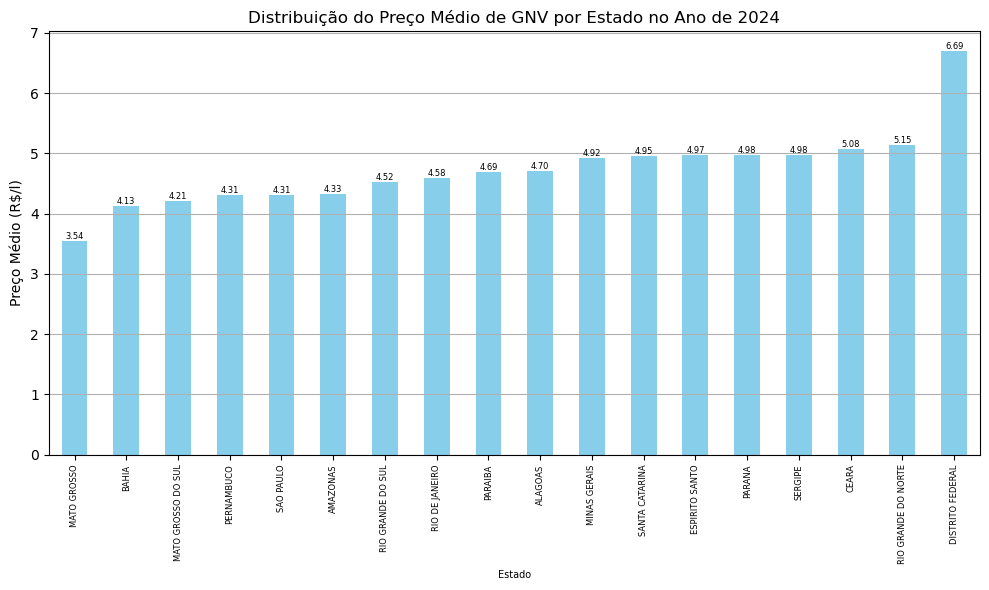

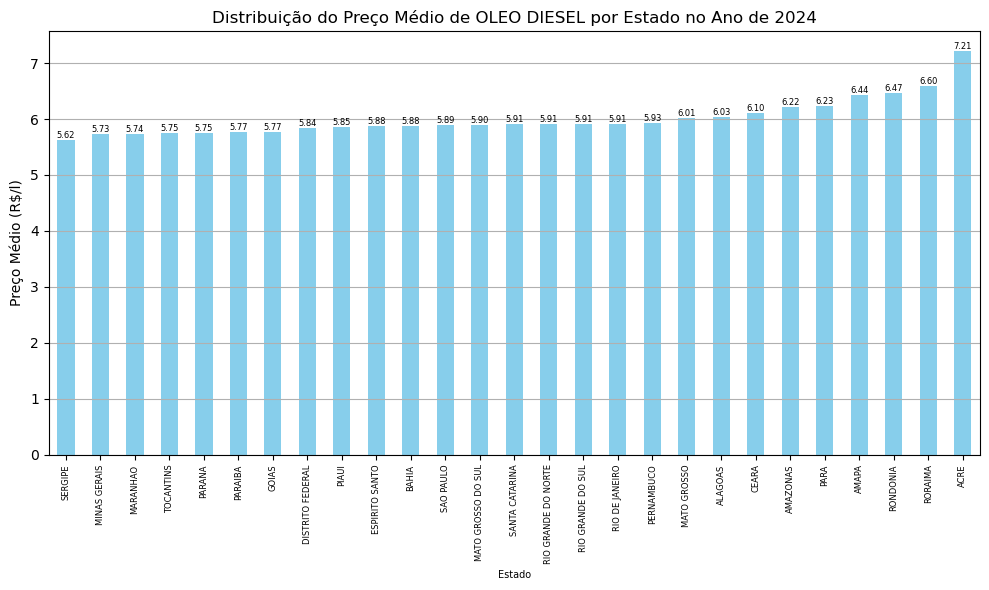

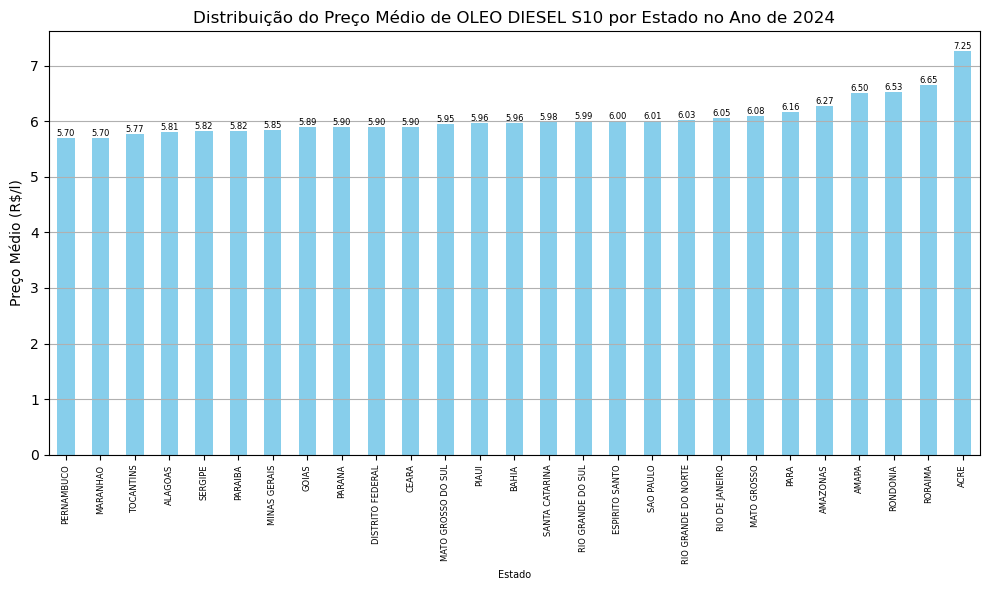

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# Extrair o ano da coluna 'DATA FINAL'
dados_combustiveis_estados['ANO'] = pd.to_datetime(dados_combustiveis_estados['DATA FINAL']).dt.year

# Encontrar o último ano disponível
ultimo_ano = dados_combustiveis_estados['ANO'].max()

# Filtrar os dados para o último ano
dados_ultimo_ano = dados_combustiveis_estados[dados_combustiveis_estados['ANO'] == ultimo_ano]

# Lista dos tipos de produto
tipos_produto = dados_ultimo_ano['PRODUTO'].unique()

# Plotar um gráfico de barras para cada tipo de produto
for produto in tipos_produto:
    # Filtrar os dados para o produto atual
    dados_produto = dados_ultimo_ano[dados_ultimo_ano['PRODUTO'] == produto]
    
    # Agrupar os dados por estado e calcular o preço médio
    preco_medio_por_estado = dados_produto.groupby('ESTADOS')['PREÇO MÉDIO REVENDA'].mean()
    preco_medio_por_estado = preco_medio_por_estado.sort_values()  # Ordenar os estados em ordem crescente de valores
    
    # Plotar o gráfico de barras
    plt.figure(figsize=(10, 6))
    preco_medio_por_estado.plot(kind='bar', color='skyblue')
    plt.title(f'Distribuição do Preço Médio de {produto} por Estado no Ano de {ultimo_ano}')
    plt.xlabel('Estado', fontsize=7)  # Definir o tamanho da fonte do rótulo do eixo x
    plt.ylabel('Preço Médio (R$/l)')
    
    # Adicionar rótulos de dados aos pontos
    for x, y in enumerate(preco_medio_por_estado):
        plt.text(x, y, f'{y:.2f}', ha='center', va='bottom', fontsize=6)
    
    plt.xticks(rotation=90, fontsize=6)  # Ajustar a rotação e o tamanho da fonte do eixo x
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()
